In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import metrics
from matplotlib.patches import Rectangle

In [2]:
xls = pd.ExcelFile('data/Air Scan data(Indoor apartment study).xlsx')
df1 = pd.read_excel(xls, 'Shambhavi')
df2 = pd.read_excel(xls, "Milan's R")
df3 = pd.read_excel(xls, "Praveen's R")
df4 = pd.read_excel(xls, "Zaib's room")
#Sheet1
header_row = 1
df1.columns = df1.iloc[header_row]
df1.dropna()
df1=df1.iloc[2:]
df1.reset_index()
#sheet4
header_row = 0
df4.columns = df4.iloc[header_row]
df4.dropna()
df4=df4.iloc[1:]
df4.reset_index()

df2.dropna()
df3.dropna()


Date      Time  PM2.5(ug/m3)  PM10(ug/m3)  co2(ppm  )  \
0     2022.01.15  20:25:00            15           23        2767   
1     2022.01.15  20:30:00            14           20        2874   
2     2022.01.15  20:35:00            13           19        3023   
3     2022.01.15  20:40:00            13           19        3183   
4     2022.01.15  20:45:00            12           18        3306   
...          ...       ...           ...          ...         ...   
2025  2022.01.22  21:10:00            20           29        1892   
2026  2022.01.22  21:15:00            36           55        1894   
2027  2022.01.22  21:20:00            68          106        1918   
2028  2022.01.22  21:25:00            69          107        1942   
2029  2022.01.22  21:30:00            75          117        1963   

      hcho(ug/m3)  tvoc(ug/m3)  co(ppm  )  no2(ppm  )  o3(ppm  )  t_ext  h_ext  
0             147         1349      1.198       0.015      0.027   20.5   51.9  
1             152         1074      1.468       0.011      0.019   20.4   52.2  
2             136         1009      1.732       0.006      0.014   20.4   52.6  
3             107          940      2.011       0.001      0.011   20.5   52.8  
4              64          930      2.212       0.000      0.006   20.6   53.0  
...           ...          ...        ...         ...        ...    ...    ...  
2025           22           98      1.084       0.020      0.029   20.1   59.2  
2026           20           74      1.089       0.021      0.030   20.1   58.1  
2027           36           89      1.092       0.016      0.027   20.1   58.4  
2028           43           99      1.102       0.012      0.022   20.1   57.2  
2029           43          233      1.120       0.021      0.029   20.1   58.2  

[2030 rows x 12 columns]

## Resample Dataset

In [3]:

df1['Date_Time']=df1['Date'].astype(str)+' '+df1['Time'].astype(str)
df1['Date_Time'] = pd.to_datetime(df1['Date_Time'])
df1=df1[['Date_Time', 'PM2.5(ug/m3)', 'PM10(ug/m3)','co(ppm  )', 'no2(ppm  )', 'o3(ppm  )']]
df1 = df1.resample('H', on='Date_Time').sum()
df1=df1.reset_index()
df1['Date_Time'] =df1['Date_Time'].values.astype(np.int64) // 10 ** 9


df2['Date_Time']=df2['Date'].astype(str)+' '+df2['Time'].astype(str)
df2['Date_Time'] = pd.to_datetime(df1['Date_Time'])
df2=df2[['Date_Time', 'PM2.5(ug/m3)', 'PM10(ug/m3)','co(ppm  )', 'no2(ppm  )', 'o3(ppm  )']]
df2 = df2.resample('H', on='Date_Time').sum()
df2=df1.reset_index()
#df2['Date_Time'] =df2['Date_Time'].values.astype(np.int64) // 10 ** 9


df3['Date_Time']=df3['Date'].astype(str)+' '+df3['Time'].astype(str)
df3['Date_Time'] = pd.to_datetime(df3['Date_Time'])
df3=df3[['Date_Time', 'PM2.5(ug/m3)', 'PM10(ug/m3)','co(ppm  )', 'no2(ppm  )', 'o3(ppm  )']]
df3 = df3.resample('H', on='Date_Time').sum()
df3=df3.reset_index()
df3['Date_Time'] =df3['Date_Time'].values.astype(np.int64) // 10 ** 9



df4['Date_Time']=df4['Date'].astype(str)+' '+df4['Time'].astype(str)
df4['Date_Time'] = pd.to_datetime(df4['Date_Time'])
df4=df4[['Date_Time', 'PM2.5(ug/m3)', 'PM10(ug/m3)','co(ppm  )', 'no2(ppm  )', 'o3(ppm  )']]
df4 = df4.resample('H', on='Date_Time').sum()
df4=df4.reset_index()
df4['Date_Time'] =df4['Date_Time'].values.astype(np.int64) // 10 ** 9




In [4]:
df1

1     Date_Time  PM2.5(ug/m3)  PM10(ug/m3)  co(ppm  )  no2(ppm  )  o3(ppm  )
0    1610798400          7590        12261    136.555       8.498      0.997
1    1610802000             0            0      0.000       0.000      0.000
2    1610805600             0            0      0.000       0.000      0.000
3    1610809200             0            0      0.000       0.000      0.000
4    1610812800             0            0      0.000       0.000      0.000
..          ...           ...          ...        ...         ...        ...
223  1611601200           148          233      0.000       0.282      0.000
224  1611604800           165          252      0.002       0.305      0.000
225  1611608400           114          167      0.016       0.117      0.000
226  1611612000           103          156      0.008       0.106      0.000
227  1611615600           104          160      0.012       0.119      0.000

[228 rows x 6 columns]

In [5]:
df2

1    index   Date_Time  PM2.5(ug/m3)  PM10(ug/m3)  co(ppm  )  no2(ppm  )  \
0        0  1610798400          7590        12261    136.555       8.498   
1        1  1610802000             0            0      0.000       0.000   
2        2  1610805600             0            0      0.000       0.000   
3        3  1610809200             0            0      0.000       0.000   
4        4  1610812800             0            0      0.000       0.000   
..     ...         ...           ...          ...        ...         ...   
223    223  1611601200           148          233      0.000       0.282   
224    224  1611604800           165          252      0.002       0.305   
225    225  1611608400           114          167      0.016       0.117   
226    226  1611612000           103          156      0.008       0.106   
227    227  1611615600           104          160      0.012       0.119   

1    o3(ppm  )  
0        0.997  
1        0.000  
2        0.000  
3        0.000  
4        0.000  
..         ...  
223      0.000  
224      0.000  
225      0.000  
226      0.000  
227      0.000  

[228 rows x 7 columns]

In [6]:
df3

Date_Time  PM2.5(ug/m3)  PM10(ug/m3)  co(ppm  )  no2(ppm  )  o3(ppm  )
0    1642276800           104          153     13.251       0.033      0.081
1    1642280400           199          297     19.778       0.034      0.130
2    1642284000          1296         2328     16.756       0.097      0.136
3    1642287600          1758         3135     15.103       0.185      0.192
4    1642291200          1120         1922     12.780       0.228      0.258
..          ...           ...          ...        ...         ...        ...
165  1642870800           303          452     11.841       0.400      0.469
166  1642874400           256          378     11.537       0.317      0.410
167  1642878000           244          358     11.949       0.298      0.391
168  1642881600           240          349     12.509       0.304      0.402
169  1642885200           308          472      7.631       0.138      0.200

[170 rows x 6 columns]

In [7]:
df4

0     Date_Time  PM2.5(ug/m3)  PM10(ug/m3)  co(ppm  )  no2(ppm  )  o3(ppm  )
0    1641654000            98          172     92.794       0.000      0.006
1    1641657600           219          365     44.154       0.000      0.067
2    1641661200           158          248     18.302       0.000      0.141
3    1641664800           127          195     18.275       0.006      0.185
4    1641668400           272          483     18.752       0.002      0.185
..          ...           ...          ...        ...         ...        ...
205  1642392000            62           89     12.868       0.000      0.219
206  1642395600            60           82     11.967       0.000      0.231
207  1642399200            60           82     12.614       0.000      0.293
208  1642402800            71          100     12.753       0.068      0.400
209  1642406400            56           80     11.635       0.132      0.305

[210 rows x 6 columns]

## Outdoor dataset

In [8]:

df = pd.read_csv('data/outdoor.csv')#pd.read_excel("data/outdoor.csv")
df=df.iloc[2:]
df.reset_index()
new = df["날짜"].str.split(":", expand = True)

df["date"]= new[0]
df["time"]= new[1]+':00:00'

df['Date_Time']=pd.to_datetime(df.date) + pd.to_timedelta(df.time)


df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Date_Time'] =df['Date_Time'].values.astype(np.int64) // 10 ** 9




df=df.fillna(0)
df=df[['Date_Time', 'PM2.5(ug/m3)', 'PM10(ug/m3)','co(ppm  )', 'no2(ppm  )', 'o3(ppm  )']]
df

Date_Time  PM2.5(ug/m3)  PM10(ug/m3)  co(ppm  )  no2(ppm  )  o3(ppm  )
2     1643580000             7           20        0.3       0.019      0.030
3     1643576400             8           26        0.4       0.042      0.012
4     1643572800             7           26        0.4       0.033      0.016
5     1643569200            10           32        0.4       0.025      0.024
6     1643565600            11           33        0.4       0.022      0.031
...          ...           ...          ...        ...         ...        ...
1027  1639890000            15           33        0.4       0.009      0.026
1028  1639886400            14           34        0.4       0.009      0.028
1029  1639882800            12           30        0.4       0.009      0.028
1030  1639879200            11           21        0.4       0.015      0.024
1031  1639875600            10           18        0.4       0.018      0.020

[1030 rows x 6 columns]

In [9]:
df4.columns

Index(['Date_Time', 'PM2.5(ug/m3)', 'PM10(ug/m3)', 'co(ppm  )', 'no2(ppm  )',
       'o3(ppm  )'],
      dtype='object', name=0)

## Concat dataset Indoor and outdoor

In [10]:
condf1=pd.concat([df1,df])
condf2=pd.concat([df2,df])
condf3=pd.concat([df3,df])
condf4=pd.concat([df4,df])

## Gernlize data

In [11]:
condf1['no2(ppm  )']=condf1['no2(ppm  )'].astype(float)*100000
condf1['o3(ppm  )']=condf1['o3(ppm  )'].astype(float)*100000

condf2['no2(ppm  )']=condf2['no2(ppm  )'].astype(float)*100000
condf2['o3(ppm  )']=condf2['o3(ppm  )'].astype(float)*100000

condf3['no2(ppm  )']=condf3['no2(ppm  )'].astype(float)*100000
condf3['o3(ppm  )']=condf3['o3(ppm  )'].astype(float)*100000

condf4['no2(ppm  )']=condf4['no2(ppm  )'].astype(float)*100000
condf4['o3(ppm  )']=condf4['o3(ppm  )'].astype(float)*100000

## Shambhavi

In [12]:
condf1

Date_Time  PM2.5(ug/m3)  PM10(ug/m3)  co(ppm  )  no2(ppm  )  o3(ppm  )
0     1610798400          7590        12261    136.555    849800.0    99700.0
1     1610802000             0            0      0.000         0.0        0.0
2     1610805600             0            0      0.000         0.0        0.0
3     1610809200             0            0      0.000         0.0        0.0
4     1610812800             0            0      0.000         0.0        0.0
...          ...           ...          ...        ...         ...        ...
1027  1639890000            15           33      0.400       900.0     2600.0
1028  1639886400            14           34      0.400       900.0     2800.0
1029  1639882800            12           30      0.400       900.0     2800.0
1030  1639879200            11           21      0.400      1500.0     2400.0
1031  1639875600            10           18      0.400      1800.0     2000.0

[1258 rows x 6 columns]

## Milan's R

In [13]:
condf2=condf2.drop(['index'],axis=1)

## Praveen's R

In [14]:
condf3

Date_Time  PM2.5(ug/m3)  PM10(ug/m3)  co(ppm  )  no2(ppm  )  o3(ppm  )
0     1642276800           104          153     13.251      3300.0     8100.0
1     1642280400           199          297     19.778      3400.0    13000.0
2     1642284000          1296         2328     16.756      9700.0    13600.0
3     1642287600          1758         3135     15.103     18500.0    19200.0
4     1642291200          1120         1922     12.780     22800.0    25800.0
...          ...           ...          ...        ...         ...        ...
1027  1639890000            15           33      0.400       900.0     2600.0
1028  1639886400            14           34      0.400       900.0     2800.0
1029  1639882800            12           30      0.400       900.0     2800.0
1030  1639879200            11           21      0.400      1500.0     2400.0
1031  1639875600            10           18      0.400      1800.0     2000.0

[1200 rows x 6 columns]

## Zaib's room

In [15]:
condf4

Date_Time  PM2.5(ug/m3)  PM10(ug/m3)  co(ppm  )  no2(ppm  )  o3(ppm  )
0     1641654000            98          172     92.794         0.0      600.0
1     1641657600           219          365     44.154         0.0     6700.0
2     1641661200           158          248     18.302         0.0    14100.0
3     1641664800           127          195     18.275       600.0    18500.0
4     1641668400           272          483     18.752       200.0    18500.0
...          ...           ...          ...        ...         ...        ...
1027  1639890000            15           33      0.400       900.0     2600.0
1028  1639886400            14           34      0.400       900.0     2800.0
1029  1639882800            12           30      0.400       900.0     2800.0
1030  1639879200            11           21      0.400      1500.0     2400.0
1031  1639875600            10           18      0.400      1800.0     2000.0

[1240 rows x 6 columns]

In [16]:
## function for random forest
def getPredictionRF(df='',inp='',target='',name=''):
        
    
    
    X = df[inp].values
    
    Y=df[target].values
    # Spliting into testing and training
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
    ## Train data Indoor
    X=X_train.reshape(-1,1)
    Y=y_train.reshape(-1,1)
    ## Test data outdoor
    Xt=X_test
    Yt=y_test
    
    
    regressor = RandomForestRegressor(n_estimators = 240)
    regressor.fit(X, Y)
    try:
        y_pred = regressor.predict(Xt.reshape(-1,1))
        RFR= pd.DataFrame({'measured indoor {}'.format(target):Yt.reshape(-1), 'Predicted indoor {}'.format(target):y_pred.reshape(-1)})
        RFR['measured indoor {}'.format(target)]=RFR['measured indoor {}'.format(target)].astype(int)
        RFR['Predicted indoor {}'.format(target)]=RFR['Predicted indoor {}'.format(target)].astype(int)

        print('Mean Absolute Error of {}:'.format(target), metrics.mean_absolute_error(Yt, y_pred))  
        print('Mean Squared Error of {}:'.format(target), metrics.mean_squared_error(Yt, y_pred))  
        print('Root Mean Squared Error of {}:'.format(target), np.sqrt(metrics.mean_squared_error(Yt, y_pred)))

        fig, ax = plt.subplots(figsize=(8, 6))
        sns.regplot(x='measured indoor {}'.format(target), y= 'Predicted indoor {}'.format(target) , data=RFR)
#         extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
#         ax.legend([extra, bar_0_10, bar_10_100], ("My explanatory text", "0-10", "10-100"))
        plt.savefig('figures/RF_'+'_'+name+'_'+target+'_.png')
        plt.show()
    except:
        pass
    
    
## function for linear regrassion

def getPredictionLR(df='',inp='',target='',name=''):
    X = df[inp].values
    
    Y=df[target].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
    
    ## Train data Indoor
    X=X_train.reshape(-1,1)
    Y=y_train.reshape(-1,1)
    ## Test data outdoor
    Xt=X_test
    Yt=y_test
    

    
    regressor = LinearRegression()
    regressor.fit(X,Y)
    try:
        y_pred = regressor.predict(Xt.reshape(-1,1))
        RFR= pd.DataFrame({'measured indoor {}'.format(target):Yt.reshape(-1), 'Predicted indoor {}'.format(target):y_pred.reshape(-1)})
        RFR['measured indoor {}'.format(target)]=RFR['measured indoor {}'.format(target)].astype(int)
        RFR['Predicted indoor {}'.format(target)]=RFR['Predicted indoor {}'.format(target)].astype(int)

        print('Mean Absolute Error of {}:'.format(target), metrics.mean_absolute_error(Yt, y_pred))  
        print('Mean Squared Error of {}:'.format(target), metrics.mean_squared_error(Yt, y_pred))  
        print('Root Mean Squared Error of {}:'.format(target), np.sqrt(metrics.mean_squared_error(Yt, y_pred)))

        fig, ax = plt.subplots(figsize=(8, 6))
        sns.regplot(x='measured indoor {}'.format(target), y= 'Predicted indoor {}'.format(target) , data=RFR)
        plt.savefig('figures/LR_'+'_'+name+'_'+target+'_.png')
        plt.show()  
    except:
        pass

    
## function for Suport vector regression
def getPredictionSVR(df='',inp='',target='',name=''):
    X = df[inp].values
    
    Y=df[target].values
    # Spliting into testing and training
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
    ## Train data Indoor
    X=X_train.reshape(-1,1)
    Y=y_train.reshape(-1,1)
    ## Test data outdoor
    Xt=X_test
    Yt=y_test
    
    
    regressor = SVR()
    regressor.fit(X, Y)
    try:
        y_pred = regressor.predict(Xt.reshape(-1,1))
        RFR= pd.DataFrame({'measured indoor {}'.format(target):Yt.reshape(-1), 'Predicted indoor {}'.format(target):y_pred.reshape(-1)})
        RFR['measured indoor {}'.format(target)]=RFR['measured indoor {}'.format(target)].astype(int)
        RFR['Predicted indoor {}'.format(target)]=RFR['Predicted indoor {}'.format(target)].astype(int)

        print('Mean Absolute Error of {}:'.format(target), metrics.mean_absolute_error(Yt, y_pred))  
        print('Mean Squared Error of {}:'.format(target), metrics.mean_squared_error(Yt, y_pred))  
        print('Root Mean Squared Error of {}:'.format(target), np.sqrt(metrics.mean_squared_error(Yt, y_pred)))

        fig, ax = plt.subplots(figsize=(8, 6))
        sns.regplot(x='measured indoor {}'.format(target), y= 'Predicted indoor {}'.format(target) , data=RFR)
        plt.savefig('figures/SVR_'+'_'+name+'_'+target+'_.png')
        plt.show()
    except:
        pass
    
    
## function for Lasso regression
def getPredictionLassoReg(df='',inp='',target='',name=''):
    X = df[inp].values
    
    Y=df[target].values
    # Spliting into testing and training
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
    ## Train data Indoor
    X=X_train.reshape(-1,1)
    Y=y_train.reshape(-1,1)
    ## Test data outdoor
    Xt=X_test
    Yt=y_test
    
    
    regressor = linear_model.Lasso(alpha=0.1)
    regressor.fit(X, Y)
    try:
        y_pred = regressor.predict(Xt.reshape(-1,1))
        RFR= pd.DataFrame({'measured indoor {}'.format(target):Yt.reshape(-1), 'Predicted indoor {}'.format(target):y_pred.reshape(-1)})
        RFR['measured indoor {}'.format(target)]=RFR['measured indoor {}'.format(target)].astype(int)
        RFR['Predicted indoor {}'.format(target)]=RFR['Predicted indoor {}'.format(target)].astype(int)

        print('Mean Absolute Error of {}:'.format(target), metrics.mean_absolute_error(Yt, y_pred))  
        print('Mean Squared Error of {}:'.format(target), metrics.mean_squared_error(Yt, y_pred))  
        print('Root Mean Squared Error of {}:'.format(target), np.sqrt(metrics.mean_squared_error(Yt, y_pred)))

        fig, ax = plt.subplots(figsize=(8, 6))
        sns.regplot(x='measured indoor {}'.format(target), y= 'Predicted indoor {}'.format(target) , data=RFR)
        plt.savefig('figures/Lasso_'+'_'+name+'_'+target+'_.png')
        plt.show()
    except:
        pass

# function for  DecisionTreeRegressor
def getPredictionDT(df='',inp='',target='',name=''):
        
    
    
    X = df[inp].values
    
    Y=df[target].values
    # Spliting into testing and training
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
    ## Train data Indoor
    X=X_train.reshape(-1,1)
    Y=y_train.reshape(-1,1)
    ## Test data outdoor
    Xt=X_test
    Yt=y_test
    
    
    regressor = DecisionTreeRegressor()
    regressor.fit(X, Y)
    try:
        y_pred = regressor.predict(Xt.reshape(-1,1))
        RFR= pd.DataFrame({'measured indoor {}'.format(target):Yt.reshape(-1), 'Predicted indoor {}'.format(target):y_pred.reshape(-1)})
        RFR['measured indoor {}'.format(target)]=RFR['measured indoor {}'.format(target)].astype(int)
        RFR['Predicted indoor {}'.format(target)]=RFR['Predicted indoor {}'.format(target)].astype(int)

        print('Mean Absolute Error of {}:'.format(target), metrics.mean_absolute_error(Yt, y_pred))  
        print('Mean Squared Error of {}:'.format(target), metrics.mean_squared_error(Yt, y_pred))  
        print('Root Mean Squared Error of {}:'.format(target), np.sqrt(metrics.mean_squared_error(Yt, y_pred)))

        fig, ax = plt.subplots(figsize=(8, 6))
        sns.regplot(x='measured indoor {}'.format(target), y= 'Predicted indoor {}'.format(target) , data=RFR)
        plt.savefig('figures/dt_'+'_'+name+'_'+target+'_.png')
        plt.show()
    except:
        pass
    

## Sheet Shambhavi RF

<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of PM2.5(ug/m3): 10.40797619047619
Mean Squared Error of PM2.5(ug/m3): 4772.54669890873
Root Mean Squared Error of PM2.5(ug/m3): 69.08362106106432


<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of PM10(ug/m3): 11.869973544973545
Mean Squared Error of PM10(ug/m3): 3670.4635362654317
Root Mean Squared Error of PM10(ug/m3): 60.5843505887901


<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of co(ppm  ): 0.40483644179894207
Mean Squared Error of co(ppm  ): 12.98647813040463
Root Mean Squared Error of co(ppm  ): 3.6036756416754034


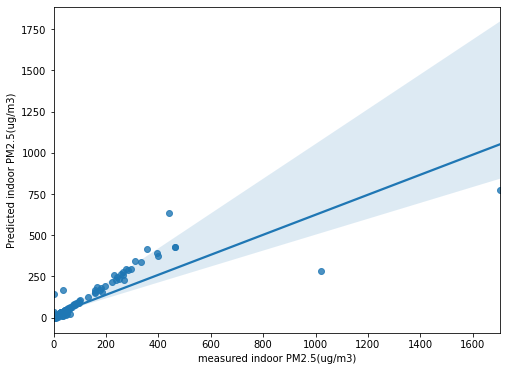

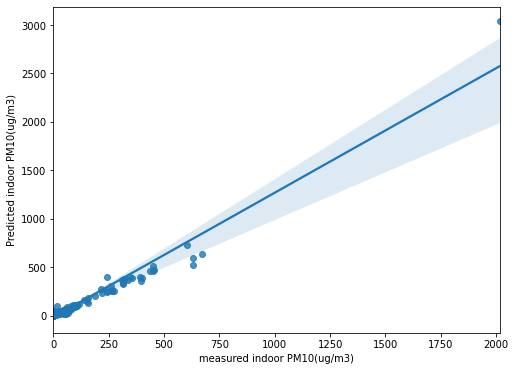

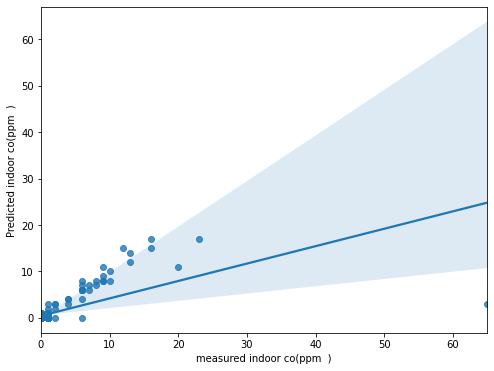

<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of no2(ppm  ): 762.7619047619046
Mean Squared Error of no2(ppm  ): 3119026.569664901
Root Mean Squared Error of no2(ppm  ): 1766.0766035664765


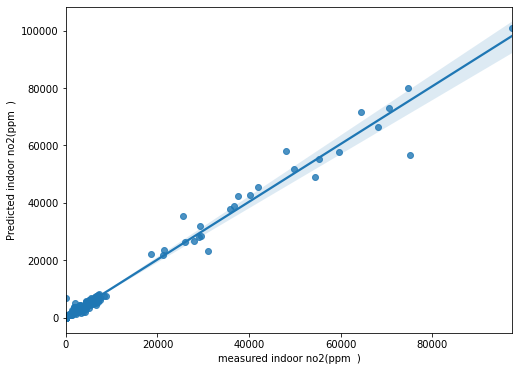

<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of o3(ppm  ): 537.443121693122
Mean Squared Error of o3(ppm  ): 31695472.452050313
Root Mean Squared Error of o3(ppm  ): 5629.873218115157


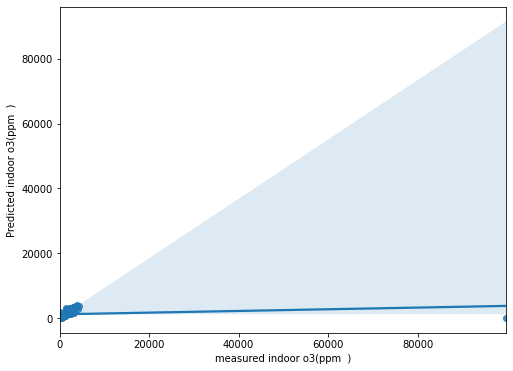

In [17]:
for col in condf1.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionRF(df=condf1,inp='Date_Time',target=col,name='shambhavi')


## Sheet Shambhavi LR

Mean Absolute Error of PM2.5(ug/m3): 42.48987422634156
Mean Squared Error of PM2.5(ug/m3): 13647.075156902549
Root Mean Squared Error of PM2.5(ug/m3): 116.82069661195548
Mean Absolute Error of PM10(ug/m3): 56.50411578012087
Mean Squared Error of PM10(ug/m3): 21137.161763506083
Root Mean Squared Error of PM10(ug/m3): 145.38625025602002
Mean Absolute Error of co(ppm  ): 0.9439584528788229
Mean Squared Error of co(ppm  ): 4.561191349082974
Root Mean Squared Error of co(ppm  ): 2.1356945823508973


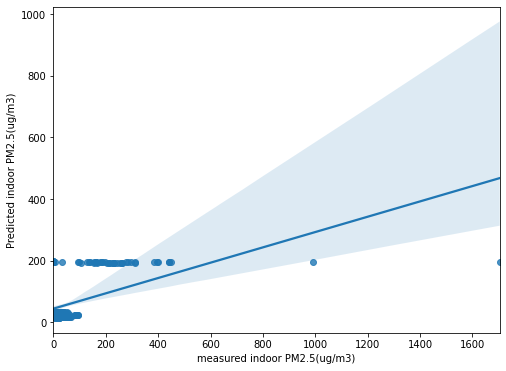

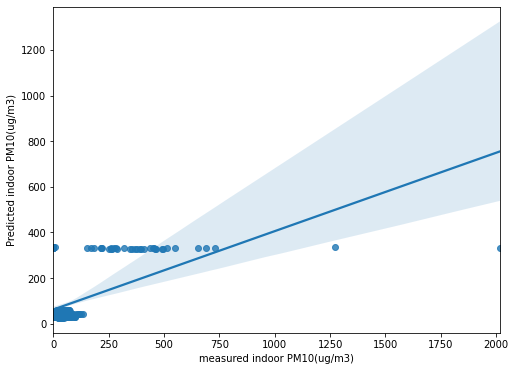

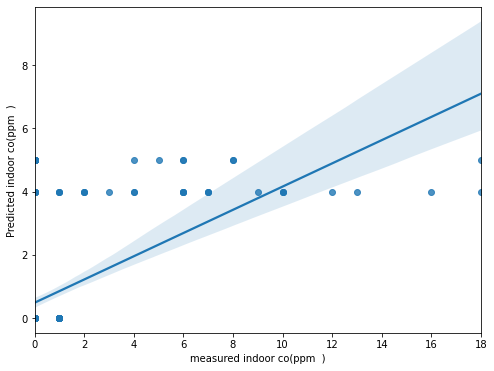

Mean Absolute Error of no2(ppm  ): 5895.516573183201
Mean Squared Error of no2(ppm  ): 152925159.5564198
Root Mean Squared Error of no2(ppm  ): 12366.291261183354


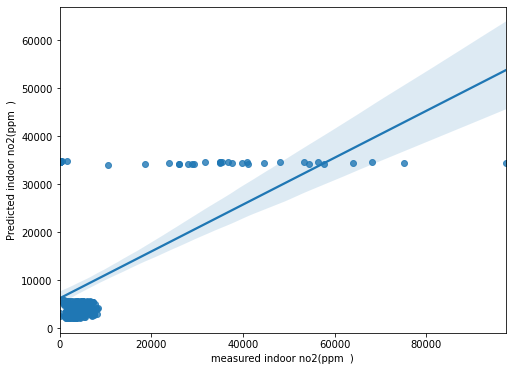

Mean Absolute Error of o3(ppm  ): 862.2957994302325
Mean Squared Error of o3(ppm  ): 957213.2378909361
Root Mean Squared Error of o3(ppm  ): 978.3727499736162


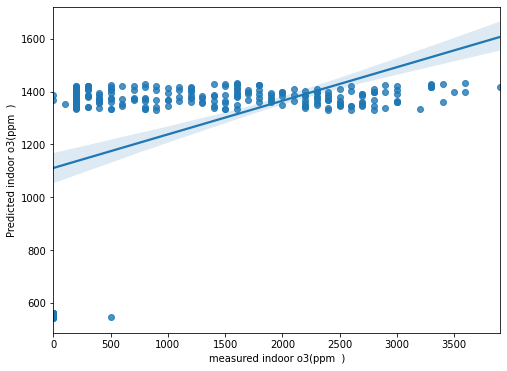

In [18]:
for col in condf1.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionLR(df=condf1,inp='Date_Time',target=col,name='shambhavi')

## Sheet Shambhavi SVR

/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of PM2.5(ug/m3): 34.150420865889636
Mean Squared Error of PM2.5(ug/m3): 8630.635950663478
Root Mean Squared Error of PM2.5(ug/m3): 92.90121608818411


/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of PM10(ug/m3): 92.80487552059455
Mean Squared Error of PM10(ug/m3): 489357.54822830966
Root Mean Squared Error of PM10(ug/m3): 699.540955361664


/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of co(ppm  ): 1.2489943285279135
Mean Squared Error of co(ppm  ): 63.667432666384165
Root Mean Squared Error of co(ppm  ): 7.979187469058749


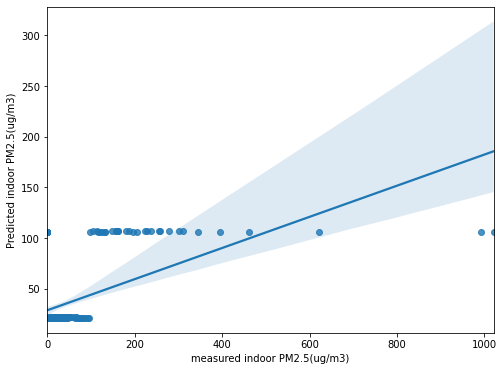

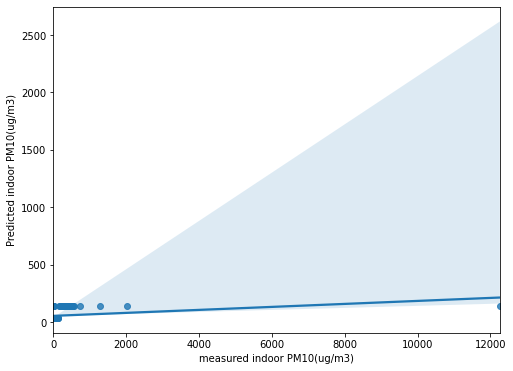

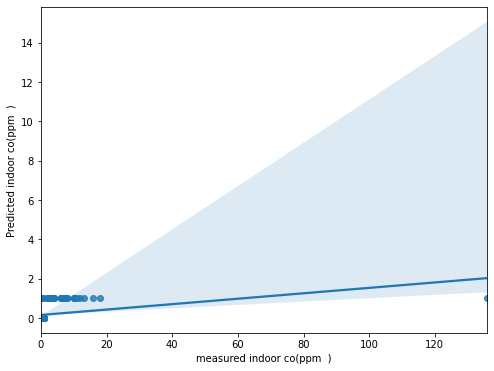

/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of no2(ppm  ): 6978.026355643832
Mean Squared Error of no2(ppm  ): 290801829.73071235
Root Mean Squared Error of no2(ppm  ): 17052.912646545527


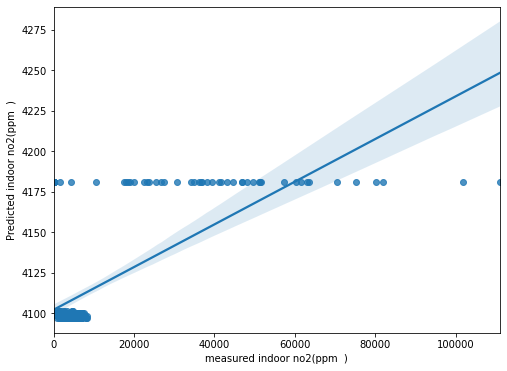

/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of o3(ppm  ): 842.5557381433962
Mean Squared Error of o3(ppm  ): 1326858.2021704856
Root Mean Squared Error of o3(ppm  ): 1151.8933119740238


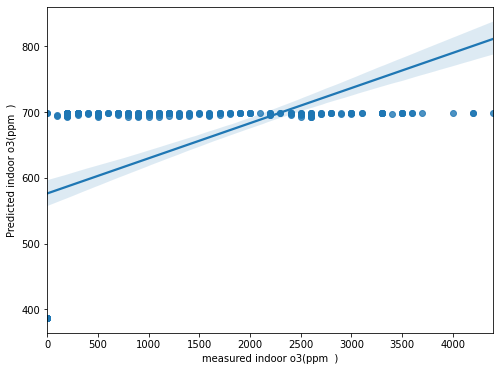

In [19]:
for col in condf1.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionSVR(df=condf1,inp='Date_Time',target=col,name='shambhavi')

## Sheet Shambhavi LAsso 

Mean Absolute Error of PM2.5(ug/m3): 35.82076334290308
Mean Squared Error of PM2.5(ug/m3): 6091.738364062859
Root Mean Squared Error of PM2.5(ug/m3): 78.04958913449101
Mean Absolute Error of PM10(ug/m3): 52.00597810328294
Mean Squared Error of PM10(ug/m3): 13595.482523161028
Root Mean Squared Error of PM10(ug/m3): 116.5996677660834
Mean Absolute Error of co(ppm  ): 1.4990515096317336
Mean Squared Error of co(ppm  ): 60.60433875027026
Root Mean Squared Error of co(ppm  ): 7.784878852639279


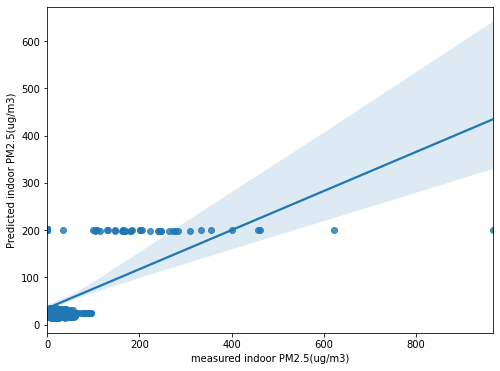

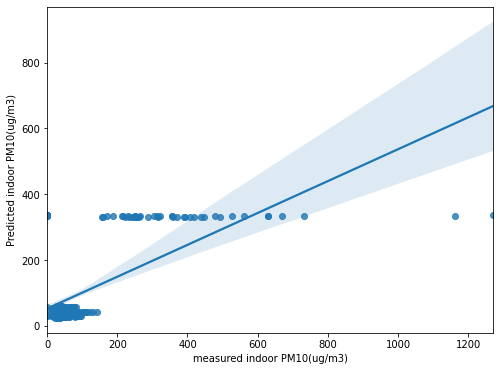

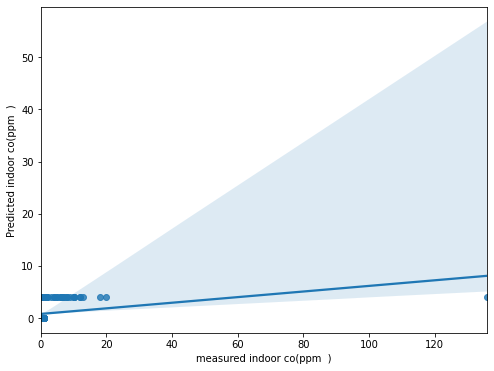

Mean Absolute Error of no2(ppm  ): 5144.30492379713
Mean Squared Error of no2(ppm  ): 115588488.17114338
Root Mean Squared Error of no2(ppm  ): 10751.208684196554


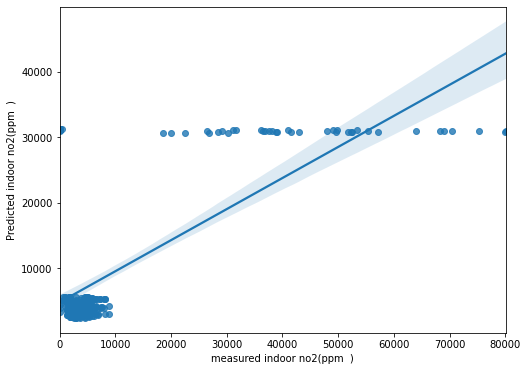

Mean Absolute Error of o3(ppm  ): 916.5121920954455
Mean Squared Error of o3(ppm  ): 1071559.3844504114
Root Mean Squared Error of o3(ppm  ): 1035.1615257776978


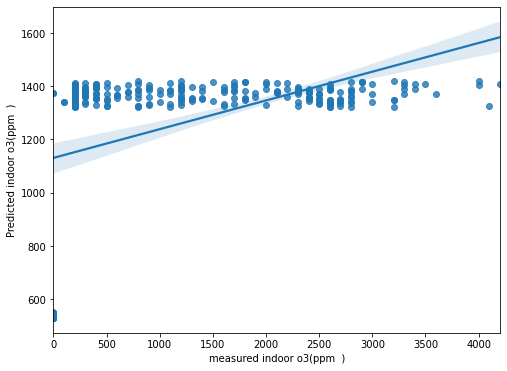

In [20]:
for col in condf1.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionLassoReg(df=condf1,inp='Date_Time',target=col,name='shambhavi')

## Shambhavi DT

Mean Absolute Error of PM2.5(ug/m3): 7.050793650793651
Mean Squared Error of PM2.5(ug/m3): 2824.0857142857144
Root Mean Squared Error of PM2.5(ug/m3): 53.142127491150696
Mean Absolute Error of PM10(ug/m3): 57.70793650793651
Mean Squared Error of PM10(ug/m3): 499073.346031746
Root Mean Squared Error of PM10(ug/m3): 706.4512340082265
Mean Absolute Error of co(ppm  ): 0.6973238095238098
Mean Squared Error of co(ppm  ): 60.08967352698417
Root Mean Squared Error of co(ppm  ): 7.751752932529788


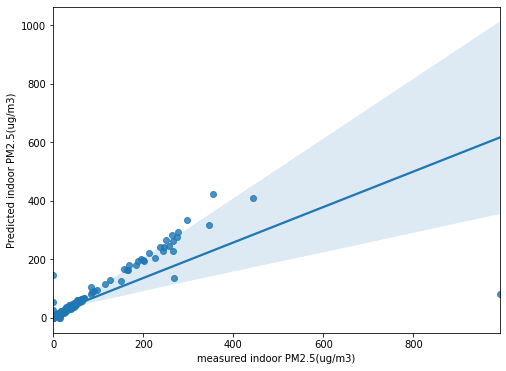

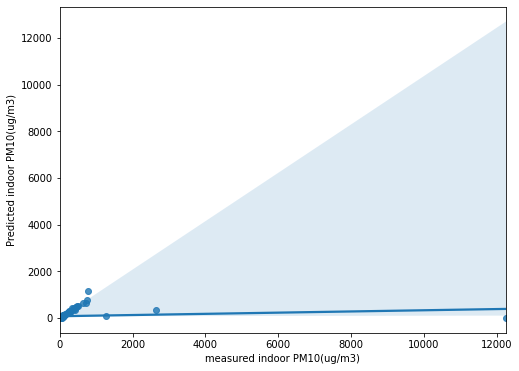

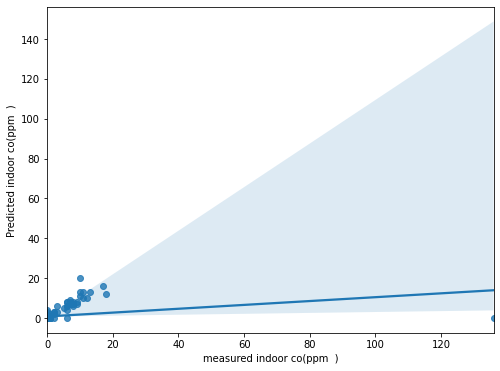

Mean Absolute Error of no2(ppm  ): 4049.2063492063485
Mean Squared Error of no2(ppm  ): 2309795904.761904
Root Mean Squared Error of no2(ppm  ): 48060.33608665158


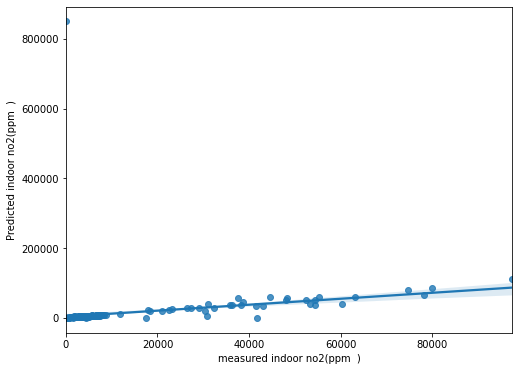

Mean Absolute Error of o3(ppm  ): 284.44444444444446
Mean Squared Error of o3(ppm  ): 265777.77777777775
Root Mean Squared Error of o3(ppm  ): 515.5363981114988


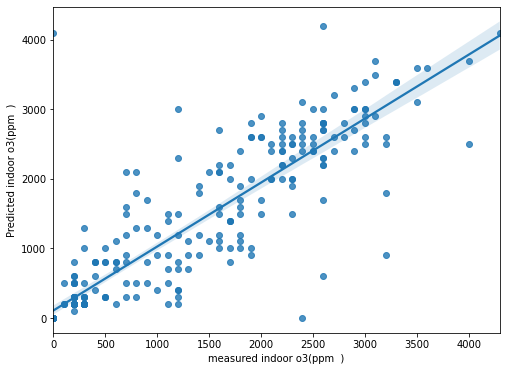

In [21]:
for col in condf1.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionDT(df=condf1,inp='Date_Time',target=col,name='shambhavi')

## Milan's R RF

<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of PM2.5(ug/m3): 12.896203703703705
Mean Squared Error of PM2.5(ug/m3): 5644.219192735891
Root Mean Squared Error of PM2.5(ug/m3): 75.12801869300088


<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of PM10(ug/m3): 54.02292328042328
Mean Squared Error of PM10(ug/m3): 485701.2524044863
Root Mean Squared Error of PM10(ug/m3): 696.9227018862897


<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of co(ppm  ): 0.37930199735449827
Mean Squared Error of co(ppm  ): 12.872128610791313
Root Mean Squared Error of co(ppm  ): 3.5877748829589784


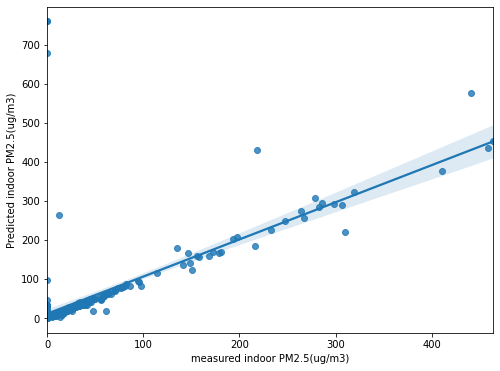

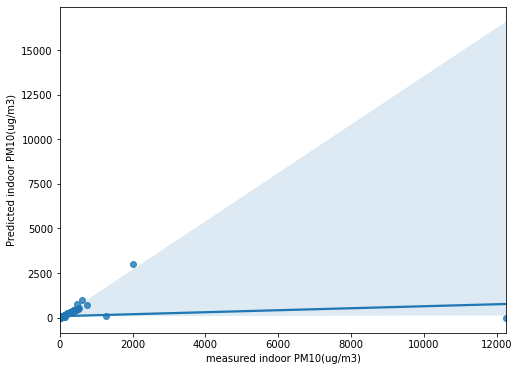

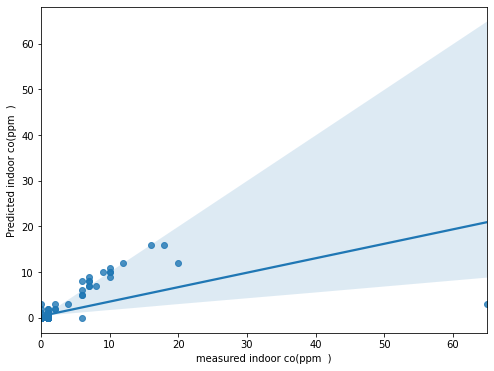

<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of no2(ppm  ): 1160.1878306878305
Mean Squared Error of no2(ppm  ): 9205203.33994709
Root Mean Squared Error of no2(ppm  ): 3034.00780156332


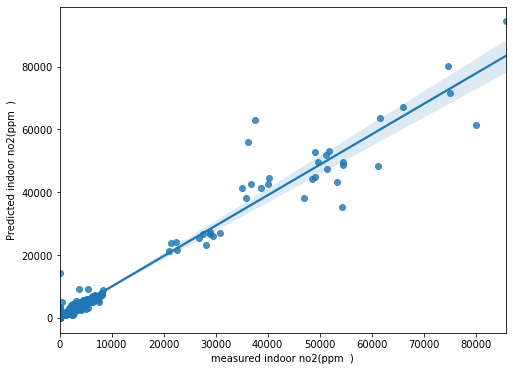

<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of o3(ppm  ): 289.3531746031746
Mean Squared Error of o3(ppm  ): 1641144.7922178137
Root Mean Squared Error of o3(ppm  ): 1281.0717357813394


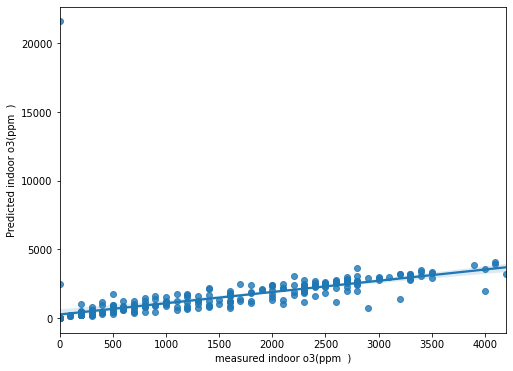

In [22]:
for col in condf2.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionRF(df=condf2,inp='Date_Time',target=col,name='milan')

## Milan's R LR

Mean Absolute Error of PM2.5(ug/m3): 38.05311762546925
Mean Squared Error of PM2.5(ug/m3): 12927.223462549562
Root Mean Squared Error of PM2.5(ug/m3): 113.69794836561283
Mean Absolute Error of PM10(ug/m3): 54.67406587280556
Mean Squared Error of PM10(ug/m3): 26984.346132596158
Root Mean Squared Error of PM10(ug/m3): 164.26912714383113
Mean Absolute Error of co(ppm  ): 1.0082495402953429
Mean Squared Error of co(ppm  ): 5.098466966907363
Root Mean Squared Error of co(ppm  ): 2.257978513384785


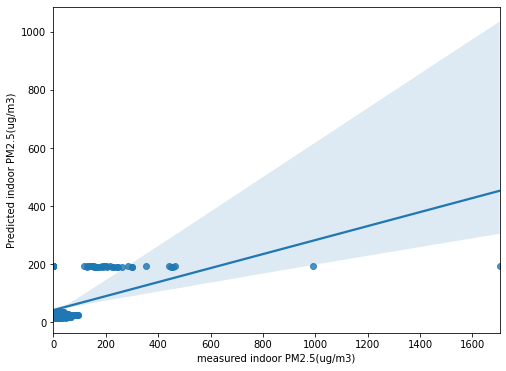

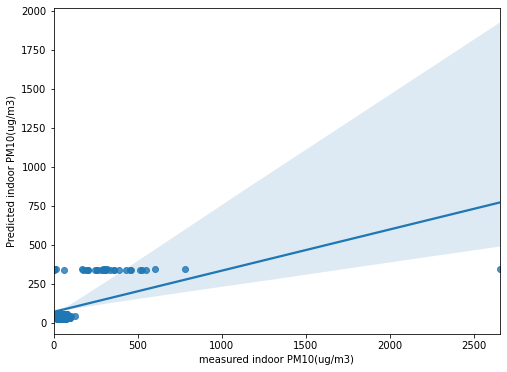

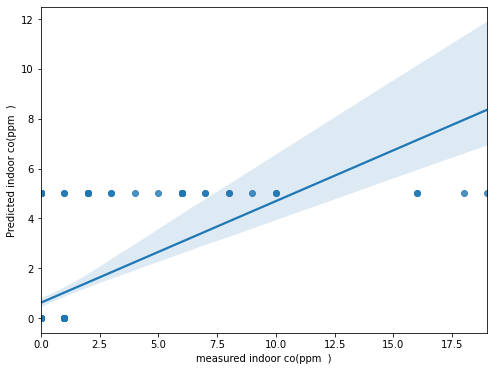

Mean Absolute Error of no2(ppm  ): 7038.896236374069
Mean Squared Error of no2(ppm  ): 2233096149.7607145
Root Mean Squared Error of no2(ppm  ): 47255.64674999925


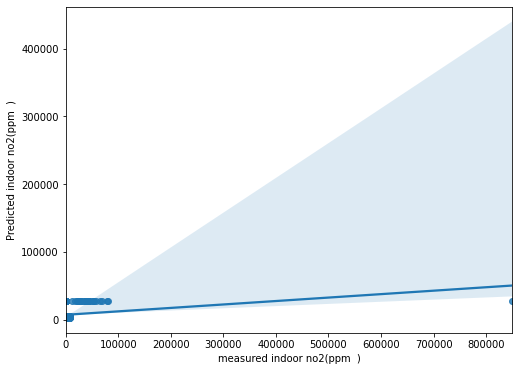

Mean Absolute Error of o3(ppm  ): 912.2802093110905
Mean Squared Error of o3(ppm  ): 1051456.6962413085
Root Mean Squared Error of o3(ppm  ): 1025.4056252241396


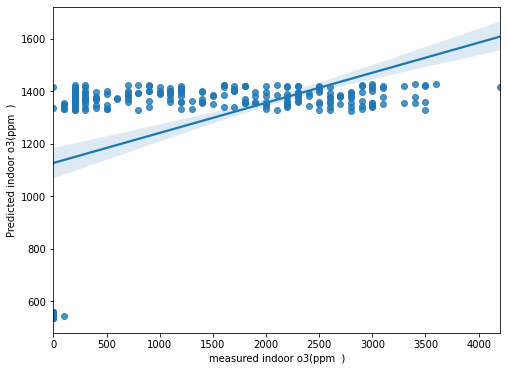

In [23]:
for col in condf1.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionLR(df=condf2,inp='Date_Time',target=col,name='milan')

## Milan's R SVR

/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of PM2.5(ug/m3): 34.14951523356523
Mean Squared Error of PM2.5(ug/m3): 6086.502723388505
Root Mean Squared Error of PM2.5(ug/m3): 78.01604144910523


/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of PM10(ug/m3): 45.38030312976864
Mean Squared Error of PM10(ug/m3): 9263.806097165228
Root Mean Squared Error of PM10(ug/m3): 96.24866802800561


/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of co(ppm  ): 1.053691362003671
Mean Squared Error of co(ppm  ): 9.452391208776854
Root Mean Squared Error of co(ppm  ): 3.074474135324097


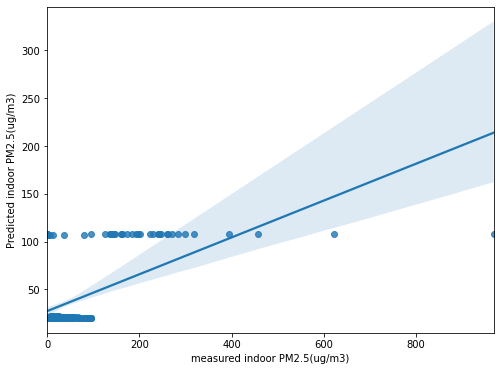

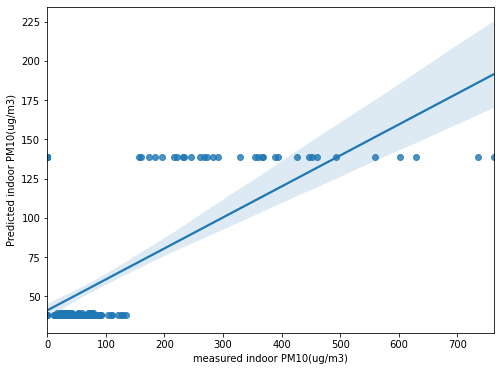

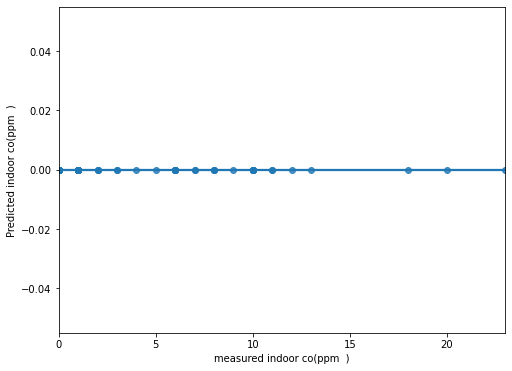

/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of no2(ppm  ): 6534.566160856626
Mean Squared Error of no2(ppm  ): 247134217.85864976
Root Mean Squared Error of no2(ppm  ): 15720.50310450177


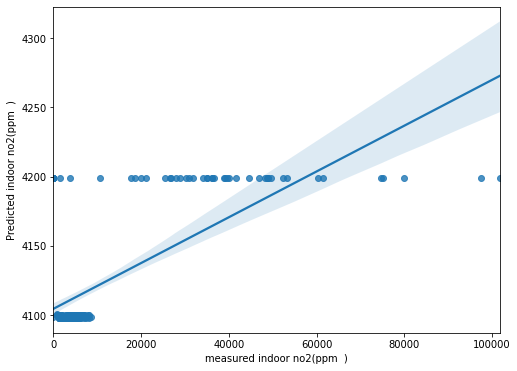

/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of o3(ppm  ): 858.2862191682153
Mean Squared Error of o3(ppm  ): 1378235.9411203011
Root Mean Squared Error of o3(ppm  ): 1173.9829390243715


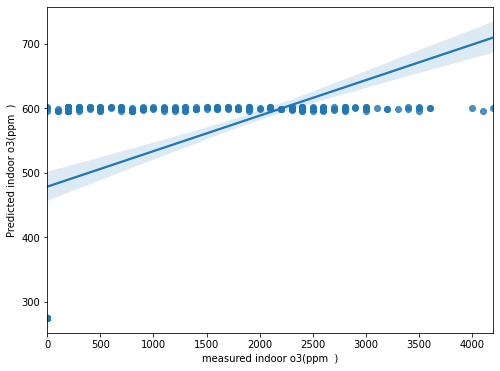

In [24]:
for col in condf1.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionSVR(df=condf2,inp='Date_Time',target=col,name='milan')

## Milan's R LAsso

Mean Absolute Error of PM2.5(ug/m3): 29.765545536459015
Mean Squared Error of PM2.5(ug/m3): 3440.183596790795
Root Mean Squared Error of PM2.5(ug/m3): 58.653078323228655
Mean Absolute Error of PM10(ug/m3): 54.97299278680859
Mean Squared Error of PM10(ug/m3): 15184.96663779608
Root Mean Squared Error of PM10(ug/m3): 123.22729664240825
Mean Absolute Error of co(ppm  ): 0.9184952338419079
Mean Squared Error of co(ppm  ): 4.351346233098984
Root Mean Squared Error of co(ppm  ): 2.0859880711784964


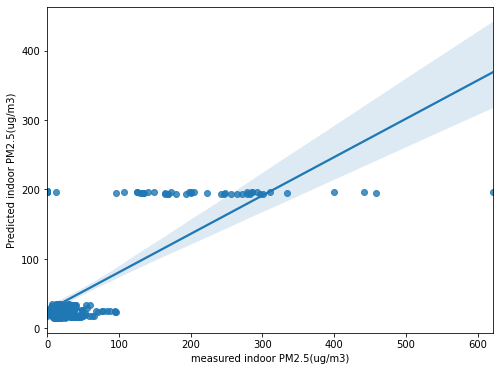

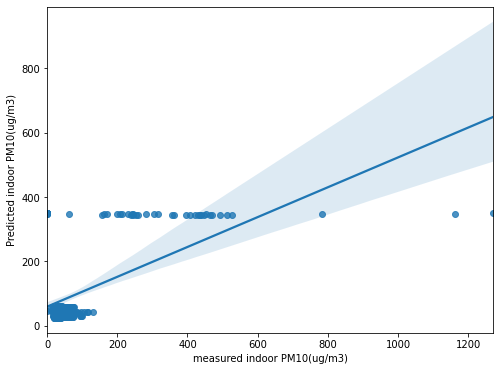

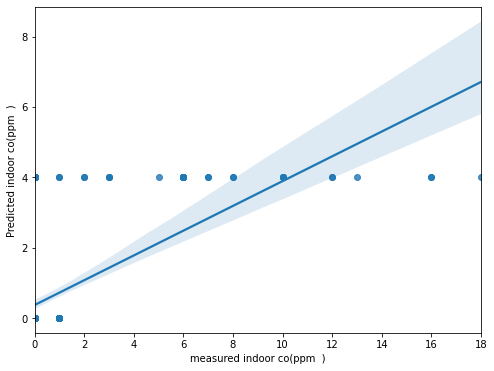

Mean Absolute Error of no2(ppm  ): 5738.03736873899
Mean Squared Error of no2(ppm  ): 150041398.72382805
Root Mean Squared Error of no2(ppm  ): 12249.138693141982


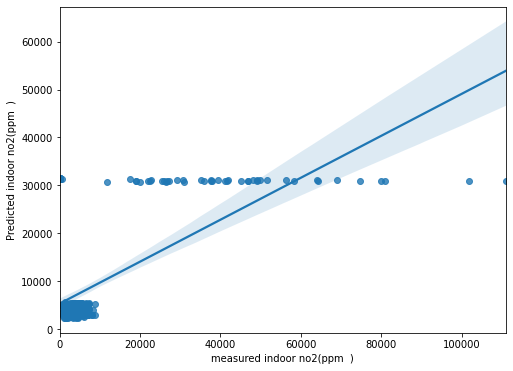

Mean Absolute Error of o3(ppm  ): 1100.8795938697897
Mean Squared Error of o3(ppm  ): 32552127.234064944
Root Mean Squared Error of o3(ppm  ): 5705.447154611542


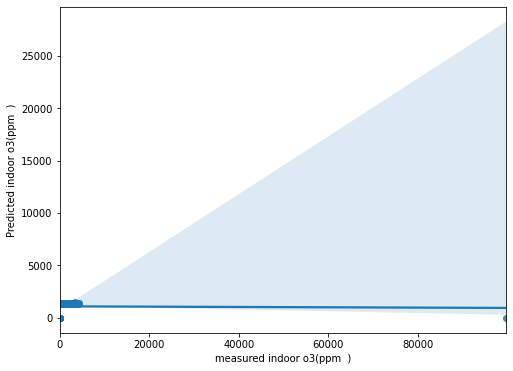

In [25]:
for col in condf1.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionLassoReg(df=condf2,inp='Date_Time',target=col,name='milan')

## Milan R DT

Mean Absolute Error of PM2.5(ug/m3): 5.758730158730159
Mean Squared Error of PM2.5(ug/m3): 457.9809523809524
Root Mean Squared Error of PM2.5(ug/m3): 21.400489536011843
Mean Absolute Error of PM10(ug/m3): 55.75873015873016
Mean Squared Error of PM10(ug/m3): 487376.0
Root Mean Squared Error of PM10(ug/m3): 698.1231982966904
Mean Absolute Error of co(ppm  ): 0.38268888888888913
Mean Squared Error of co(ppm  ): 12.10326581904765
Root Mean Squared Error of co(ppm  ): 3.4789748229970923


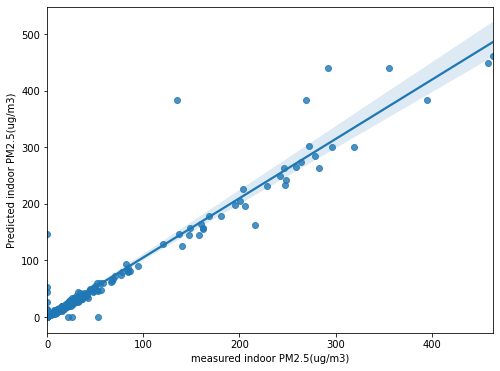

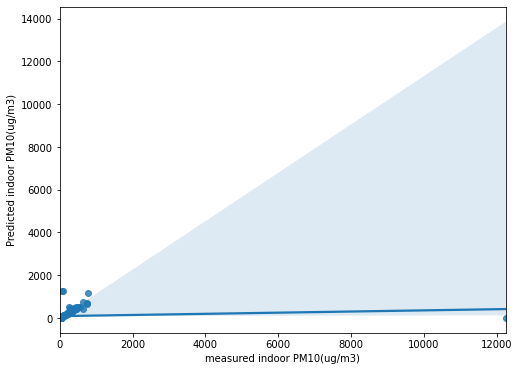

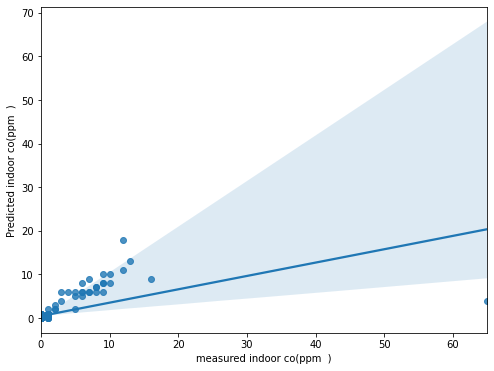

Mean Absolute Error of no2(ppm  ): 1397.4603174603176
Mean Squared Error of no2(ppm  ): 19906095.23809525
Root Mean Squared Error of no2(ppm  ): 4461.624730756191


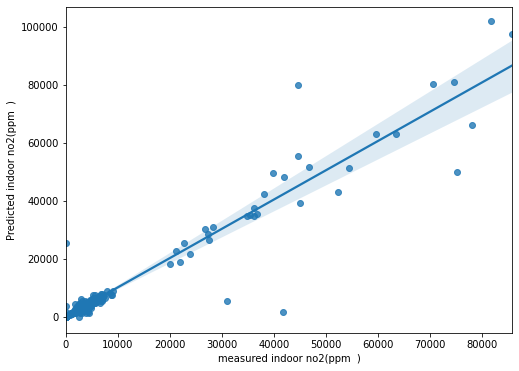

Mean Absolute Error of o3(ppm  ): 266.984126984127
Mean Squared Error of o3(ppm  ): 227777.77777777778
Root Mean Squared Error of o3(ppm  ): 477.26070210921176


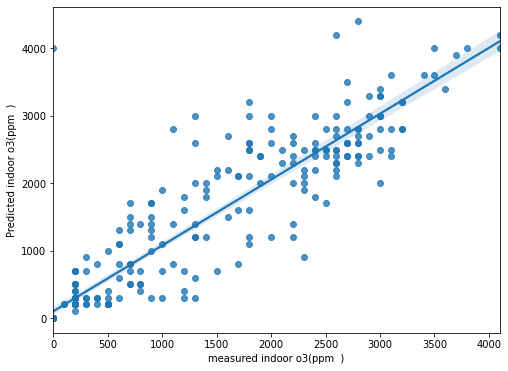

In [26]:
for col in condf1.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionDT(df=condf2,inp='Date_Time',target=col,name='milan')

## Praveen's R RF

<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of PM2.5(ug/m3): 40.99891531084656
Mean Squared Error of PM2.5(ug/m3): 17727.147576871943
Root Mean Squared Error of PM2.5(ug/m3): 133.14333470689377


<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of PM10(ug/m3): 55.06433460648149
Mean Squared Error of PM10(ug/m3): 40481.89547515253
Root Mean Squared Error of PM10(ug/m3): 201.20113189331846


<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of co(ppm  ): 1.60037208170194
Mean Squared Error of co(ppm  ): 11.366441447668503
Root Mean Squared Error of co(ppm  ): 3.37141534784258


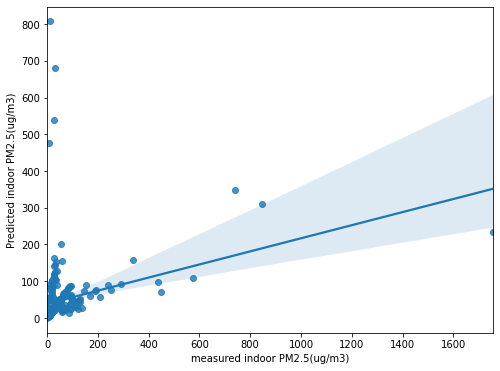

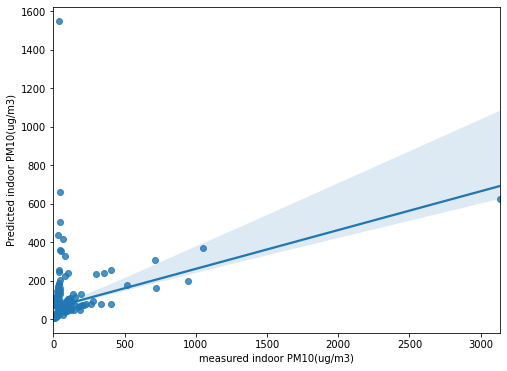

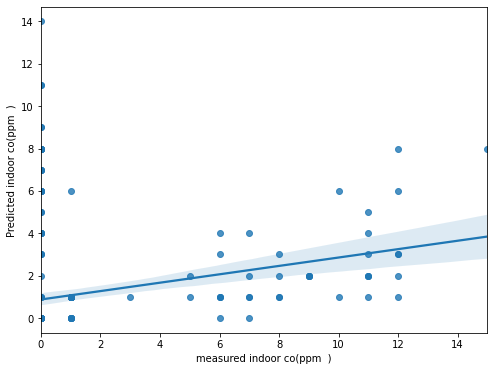

<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of no2(ppm  ): 5477.074679232805
Mean Squared Error of no2(ppm  ): 119360617.0659284
Root Mean Squared Error of no2(ppm  ): 10925.228467447645


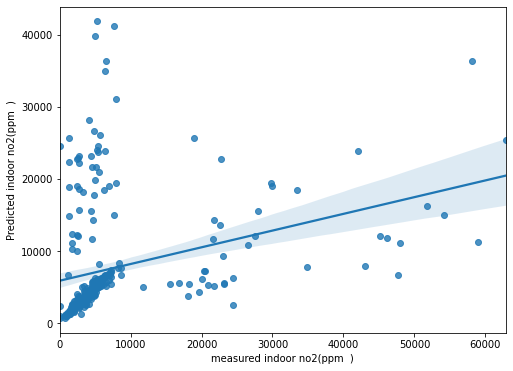

<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of o3(ppm  ): 8198.174150132276
Mean Squared Error of o3(ppm  ): 238289402.89554942
Root Mean Squared Error of o3(ppm  ): 15436.62537265025


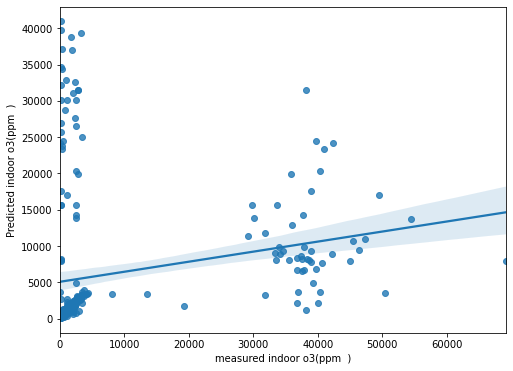

In [27]:
for col in condf3.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionRF(df=condf3,inp='Date_Time',target=col,name='parveen')

## Praveen's R SVR

/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of PM2.5(ug/m3): 44.36316653974153
Mean Squared Error of PM2.5(ug/m3): 25719.477770689944
Root Mean Squared Error of PM2.5(ug/m3): 160.37293341050398


/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of PM10(ug/m3): 58.59523243425394
Mean Squared Error of PM10(ug/m3): 49714.8501369492
Root Mean Squared Error of PM10(ug/m3): 222.9682715925053


/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of co(ppm  ): 1.3101592186806446
Mean Squared Error of co(ppm  ): 10.544735455428992
Root Mean Squared Error of co(ppm  ): 3.247265843048424


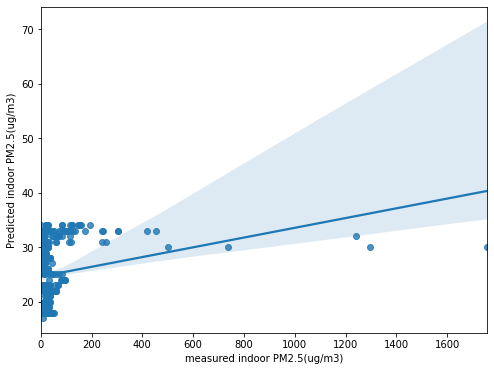

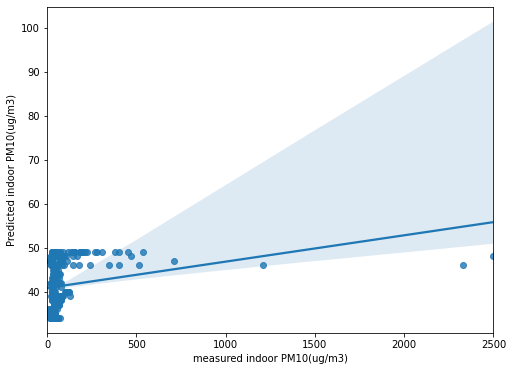

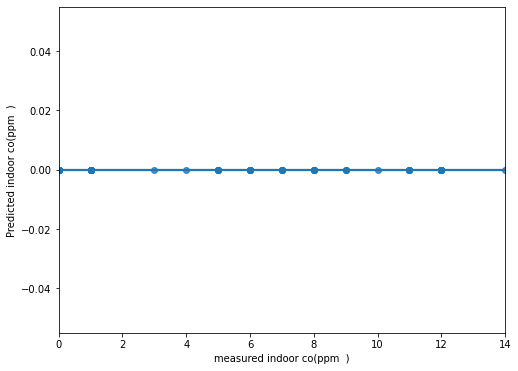

/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of no2(ppm  ): 5248.99615657152
Mean Squared Error of no2(ppm  ): 144671705.03009135
Root Mean Squared Error of no2(ppm  ): 12027.955147492501


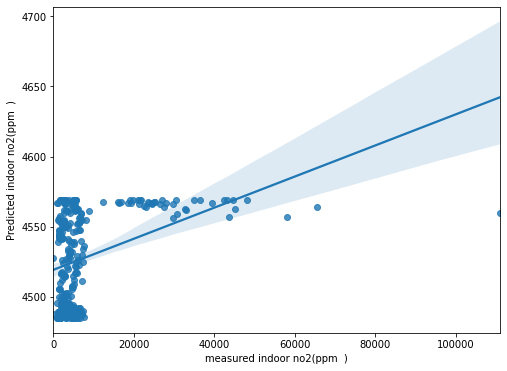

/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of o3(ppm  ): 5198.019175502156
Mean Squared Error of o3(ppm  ): 169468430.7987747
Root Mean Squared Error of o3(ppm  ): 13018.004101964889


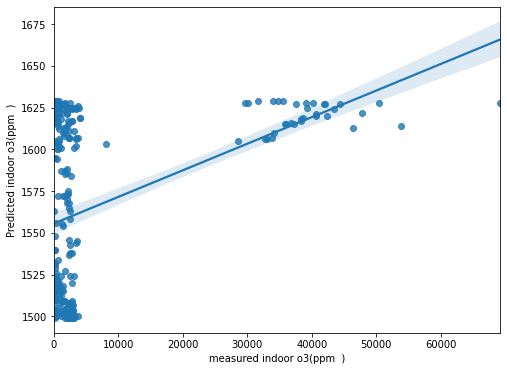

In [28]:
for col in condf1.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionSVR(df=condf3,inp='Date_Time',target=col,name='parveen')

## Praveen's R LAsso

Mean Absolute Error of PM2.5(ug/m3): 42.876988855483944
Mean Squared Error of PM2.5(ug/m3): 12039.304837723781
Root Mean Squared Error of PM2.5(ug/m3): 109.7237660569659
Mean Absolute Error of PM10(ug/m3): 66.25277759924747
Mean Squared Error of PM10(ug/m3): 44439.210939491495
Root Mean Squared Error of PM10(ug/m3): 210.80609796562217
Mean Absolute Error of co(ppm  ): 1.860333077284806
Mean Squared Error of co(ppm  ): 7.843305649898778
Root Mean Squared Error of co(ppm  ): 2.8005902324150846


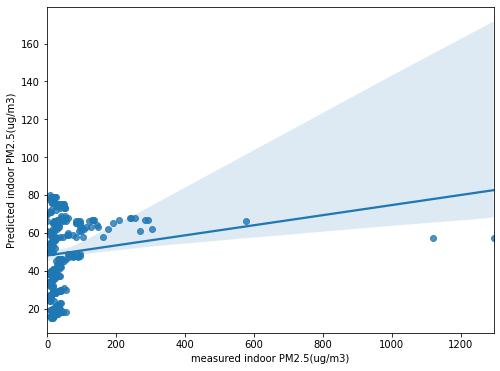

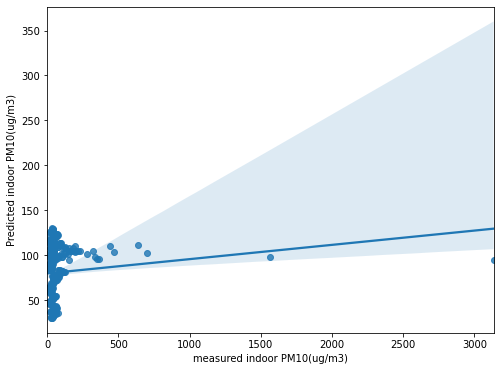

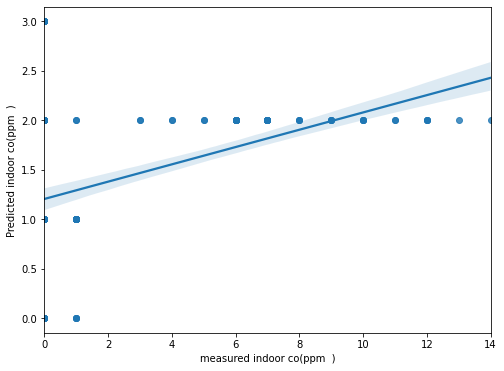

Mean Absolute Error of no2(ppm  ): 6038.005968526487
Mean Squared Error of no2(ppm  ): 82057996.08333445
Root Mean Squared Error of no2(ppm  ): 9058.586870110285


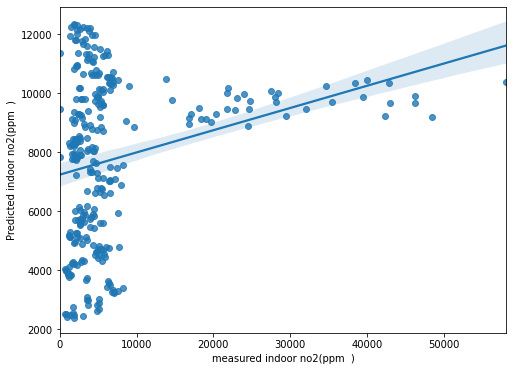

Mean Absolute Error of o3(ppm  ): 8152.119576476343
Mean Squared Error of o3(ppm  ): 133475807.93376346
Root Mean Squared Error of o3(ppm  ): 11553.173067766425


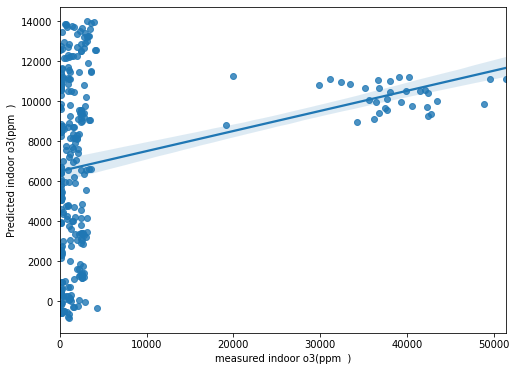

In [29]:
for col in condf1.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionLassoReg(df=condf3,inp='Date_Time',target=col,name='parveen')

## Praveen's R LR

Mean Absolute Error of PM2.5(ug/m3): 44.46222812663991
Mean Squared Error of PM2.5(ug/m3): 15759.37814193707
Root Mean Squared Error of PM2.5(ug/m3): 125.5363618316903
Mean Absolute Error of PM10(ug/m3): 58.93598000786699
Mean Squared Error of PM10(ug/m3): 13304.706687159758
Root Mean Squared Error of PM10(ug/m3): 115.34603021846812
Mean Absolute Error of co(ppm  ): 1.8582794674660188
Mean Squared Error of co(ppm  ): 8.36887490872249
Root Mean Squared Error of co(ppm  ): 2.89290077754535


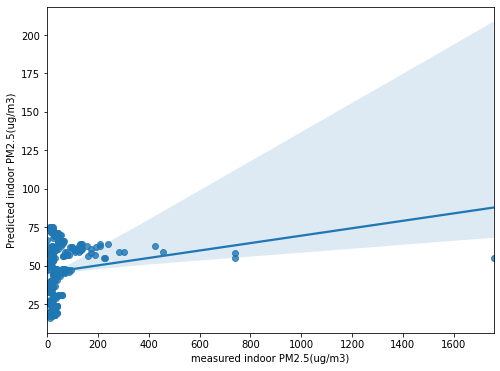

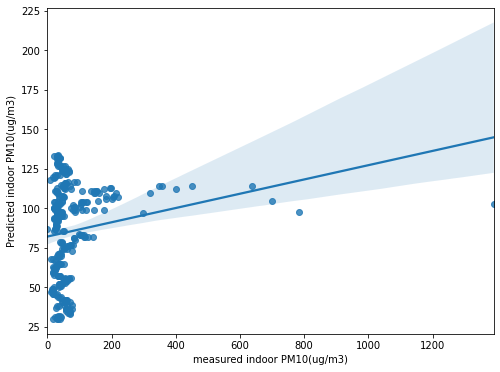

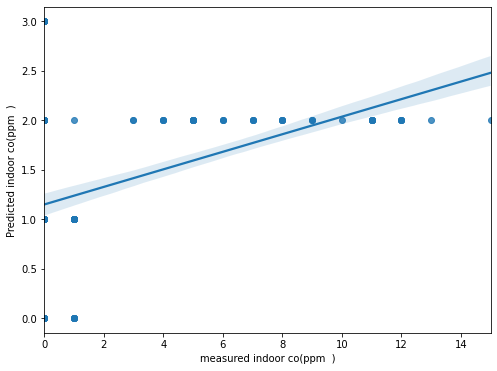

Mean Absolute Error of no2(ppm  ): 5987.426299637298
Mean Squared Error of no2(ppm  ): 80997400.90732968
Root Mean Squared Error of no2(ppm  ): 8999.855604804428


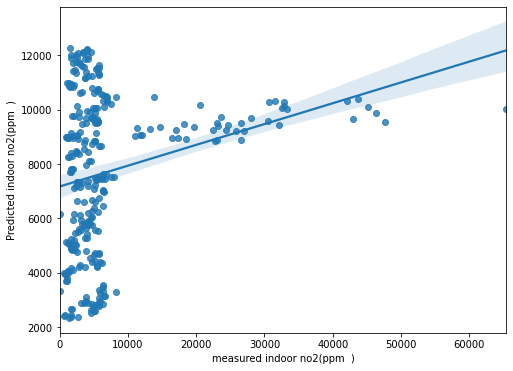

Mean Absolute Error of o3(ppm  ): 8721.143398169117
Mean Squared Error of o3(ppm  ): 174106058.98191753
Root Mean Squared Error of o3(ppm  ): 13194.92550118861


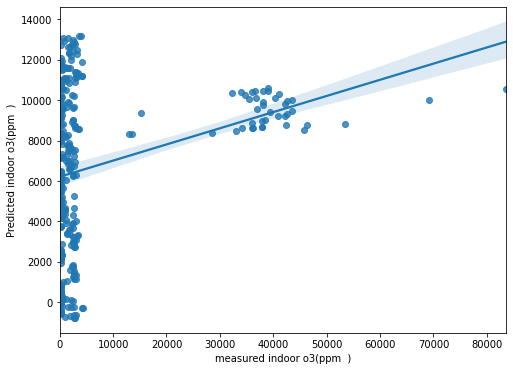

In [30]:
for col in condf3.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionLR(df=condf3,inp='Date_Time',target=col,name='parveen')

## Preveen R DT

Mean Absolute Error of PM2.5(ug/m3): 64.69666666666667
Mean Squared Error of PM2.5(ug/m3): 42169.755
Root Mean Squared Error of PM2.5(ug/m3): 205.3527574687031
Mean Absolute Error of PM10(ug/m3): 99.35666666666667
Mean Squared Error of PM10(ug/m3): 108245.905
Root Mean Squared Error of PM10(ug/m3): 329.0074543228466
Mean Absolute Error of co(ppm  ): 2.7494966666666665
Mean Squared Error of co(ppm  ): 25.181516515
Root Mean Squared Error of co(ppm  ): 5.018118822327746


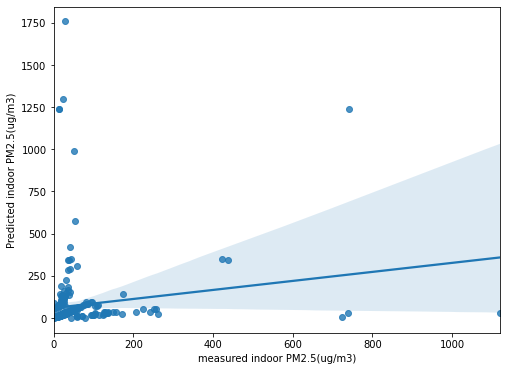

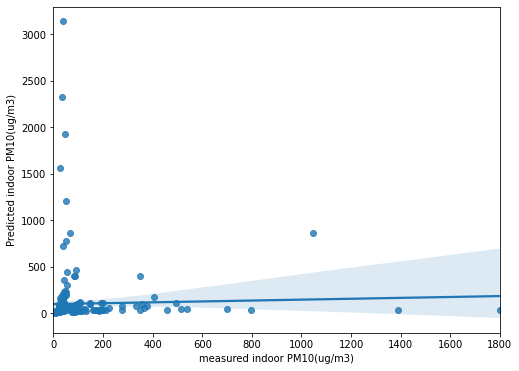

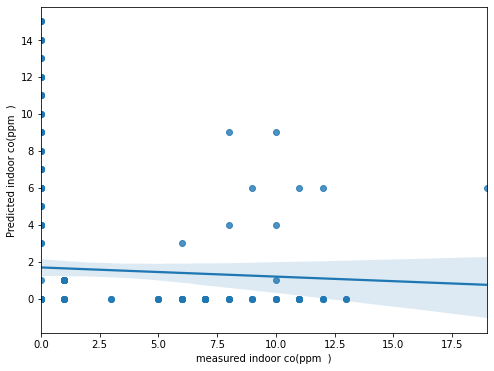

Mean Absolute Error of no2(ppm  ): 6656.0
Mean Squared Error of no2(ppm  ): 205701416.66666672
Root Mean Squared Error of no2(ppm  ): 14342.294679257804


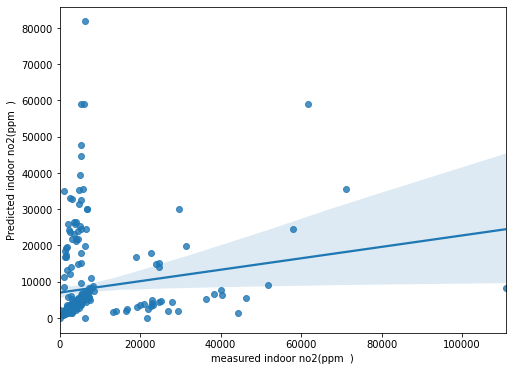

Mean Absolute Error of o3(ppm  ): 8633.333333333336
Mean Squared Error of o3(ppm  ): 298285966.66666675
Root Mean Squared Error of o3(ppm  ): 17270.957317608852


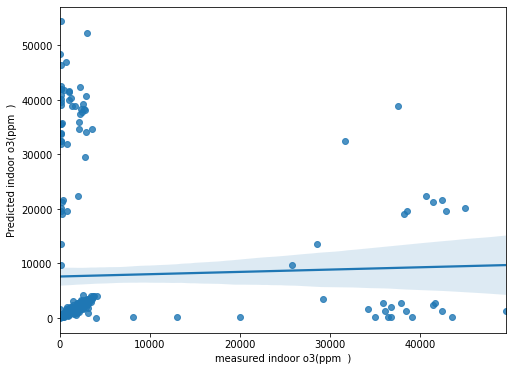

In [31]:
for col in condf1.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionDT(df=condf3,inp='Date_Time',target=col,name='parveen')

## Zaib's room RF

<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of PM2.5(ug/m3): 111.64581217997953
Mean Squared Error of PM2.5(ug/m3): 118112.25955268301
Root Mean Squared Error of PM2.5(ug/m3): 343.674641998334


<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of PM10(ug/m3): 131.61406413210446
Mean Squared Error of PM10(ug/m3): 217576.80560372307
Root Mean Squared Error of PM10(ug/m3): 466.4512896366812


<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of co(ppm  ): 4.6507457510134005
Mean Squared Error of co(ppm  ): 106.65949161276279
Root Mean Squared Error of co(ppm  ): 10.327608223241372


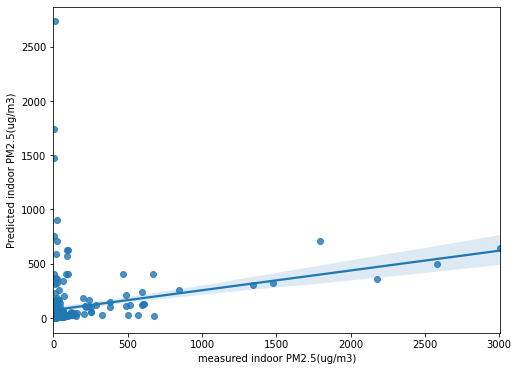

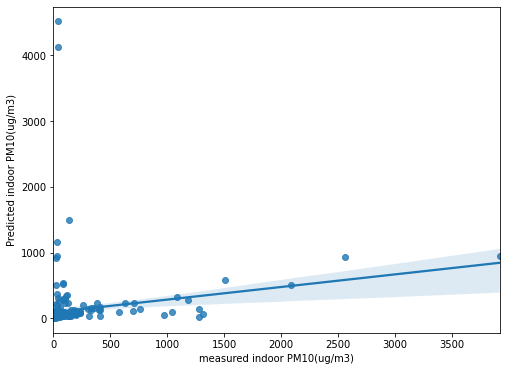

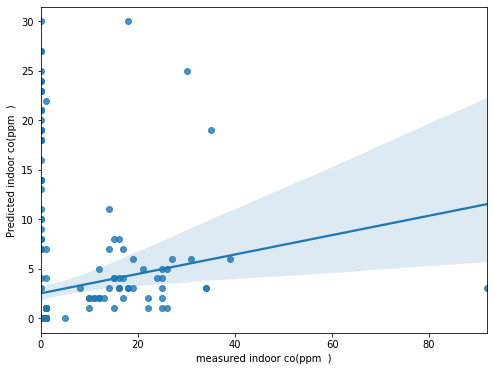

<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of no2(ppm  ): 1455.0755429680833
Mean Squared Error of no2(ppm  ): 15469058.649828307
Root Mean Squared Error of no2(ppm  ): 3933.0724185842687


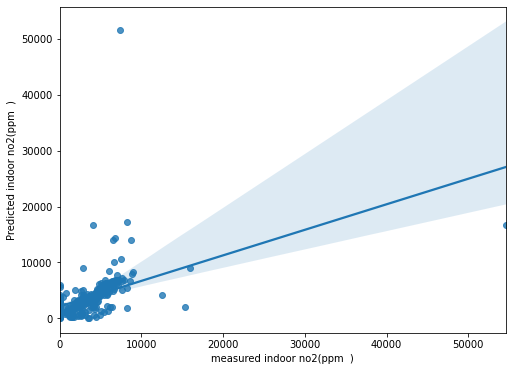

<ipython-input-16-ce7c5537863f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


Mean Absolute Error of o3(ppm  ): 8757.479797107017
Mean Squared Error of o3(ppm  ): 265170339.60382503
Root Mean Squared Error of o3(ppm  ): 16284.051694950647


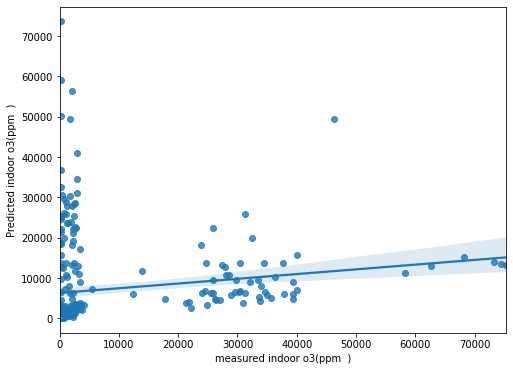

In [32]:
for col in condf4.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionRF(df=condf4,inp='Date_Time',target=col,name='zaib')

## Zaib's room LR

Mean Absolute Error of PM2.5(ug/m3): 104.07720997245225
Mean Squared Error of PM2.5(ug/m3): 66851.6460102063
Root Mean Squared Error of PM2.5(ug/m3): 258.5568525686494
Mean Absolute Error of PM10(ug/m3): 168.45105059396963
Mean Squared Error of PM10(ug/m3): 205430.97495322145
Root Mean Squared Error of PM10(ug/m3): 453.24493924722583
Mean Absolute Error of co(ppm  ): 5.898563640894929
Mean Squared Error of co(ppm  ): 77.43491889943886
Root Mean Squared Error of co(ppm  ): 8.799711296368697


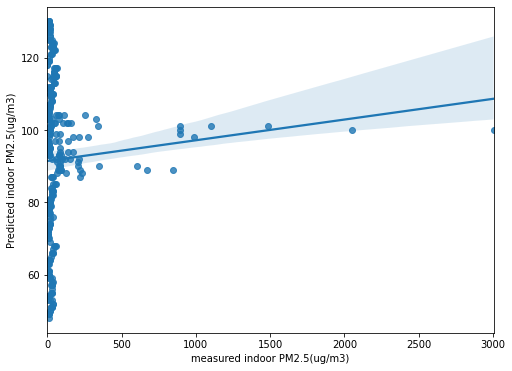

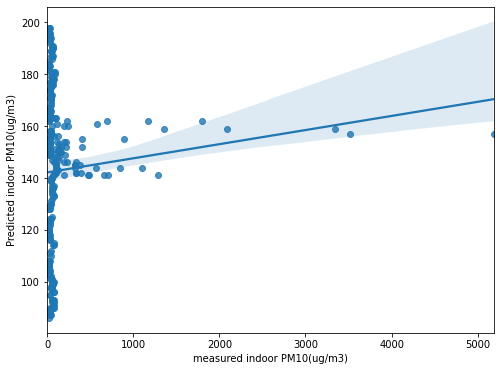

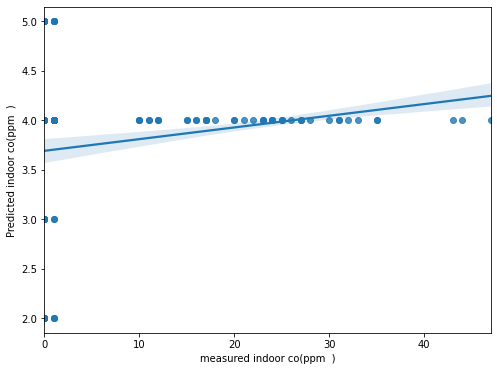

Mean Absolute Error of no2(ppm  ): 2184.1281317333223
Mean Squared Error of no2(ppm  ): 17704555.37295889
Root Mean Squared Error of no2(ppm  ): 4207.678145124564


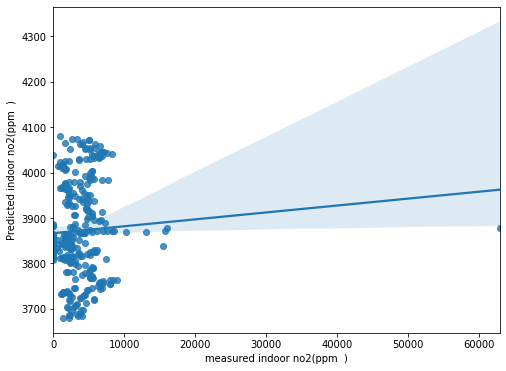

Mean Absolute Error of o3(ppm  ): 7766.049618302398
Mean Squared Error of o3(ppm  ): 143042959.12423465
Root Mean Squared Error of o3(ppm  ): 11960.056819440058


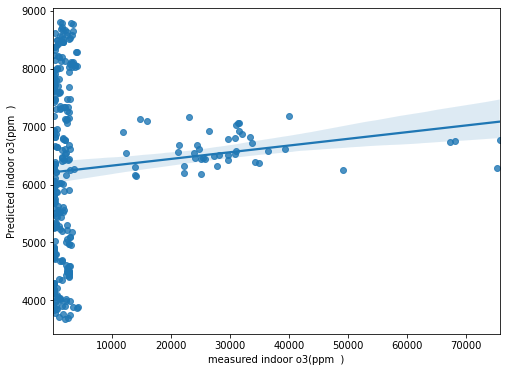

In [33]:
for col in condf4.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionLR(df=condf4,inp='Date_Time',target=col,name='zaib')

## Zaib's room LAsso

Mean Absolute Error of PM2.5(ug/m3): 115.2318992328271
Mean Squared Error of PM2.5(ug/m3): 111018.25605088468
Root Mean Squared Error of PM2.5(ug/m3): 333.19402163136823
Mean Absolute Error of PM10(ug/m3): 172.8821463003513
Mean Squared Error of PM10(ug/m3): 182363.85133686184
Root Mean Squared Error of PM10(ug/m3): 427.04080757798994
Mean Absolute Error of co(ppm  ): 6.278911776045317
Mean Squared Error of co(ppm  ): 111.94410746124589
Root Mean Squared Error of co(ppm  ): 10.580364240480849


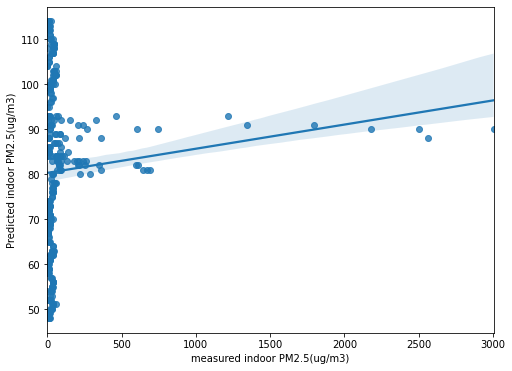

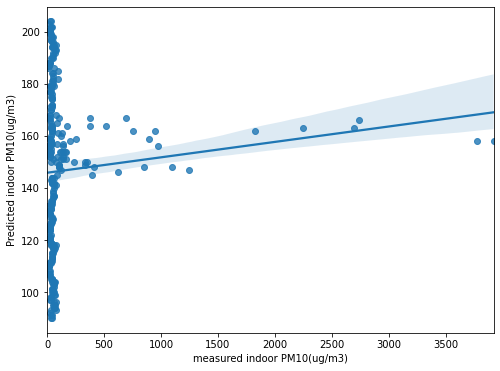

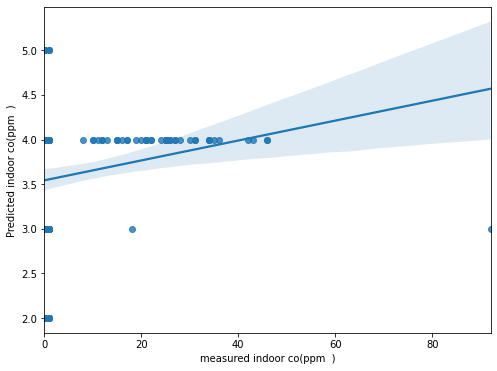

Mean Absolute Error of no2(ppm  ): 2050.8816602927227
Mean Squared Error of no2(ppm  ): 8684102.116550775
Root Mean Squared Error of no2(ppm  ): 2946.8800648398937


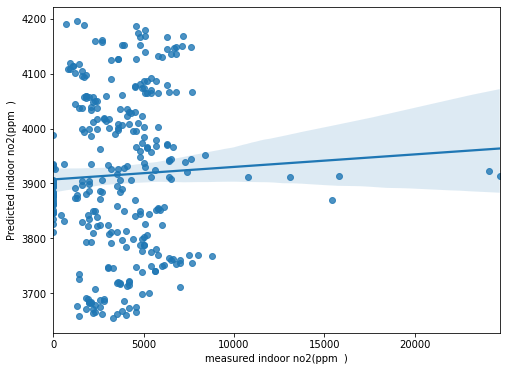

Mean Absolute Error of o3(ppm  ): 8644.834281498506
Mean Squared Error of o3(ppm  ): 200952785.40410653
Root Mean Squared Error of o3(ppm  ): 14175.781650551286


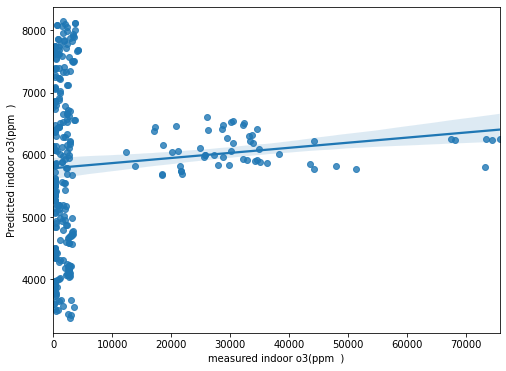

In [34]:
for col in condf1.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionLassoReg(df=condf4,inp='Date_Time',target=col,name='zaib')

## Zaib's room SVR

/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of PM2.5(ug/m3): 93.76464663097165
Mean Squared Error of PM2.5(ug/m3): 115421.56555954895
Root Mean Squared Error of PM2.5(ug/m3): 339.7374950745781


/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of PM10(ug/m3): 127.11191970810125
Mean Squared Error of PM10(ug/m3): 304513.26811984606
Root Mean Squared Error of PM10(ug/m3): 551.8272085715292


/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of co(ppm  ): 3.5232590466133153
Mean Squared Error of co(ppm  ): 84.63175140192538
Root Mean Squared Error of co(ppm  ): 9.19955169570373


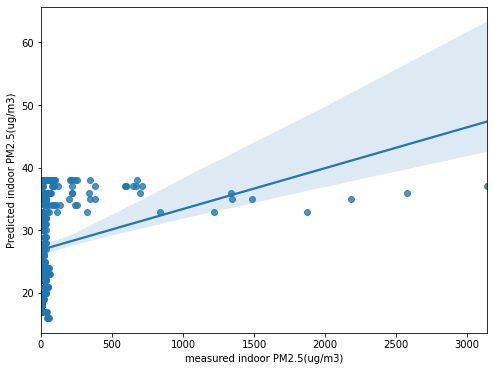

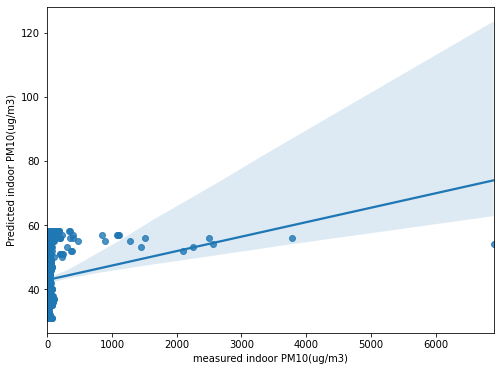

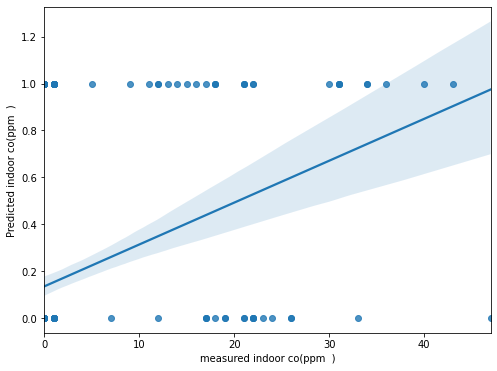

/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of no2(ppm  ): 2301.216125392388
Mean Squared Error of no2(ppm  ): 29746566.027567998
Root Mean Squared Error of no2(ppm  ): 5454.04125649669


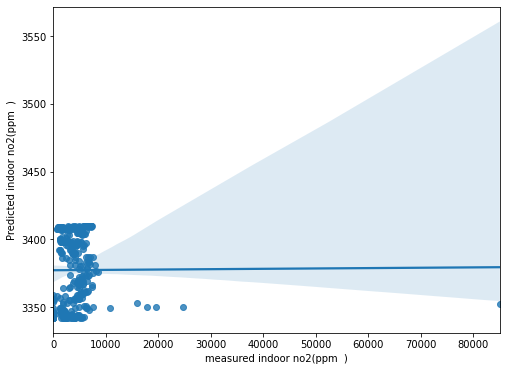

/Users/rahulbadhan/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error of o3(ppm  ): 6140.61957302041
Mean Squared Error of o3(ppm  ): 203274760.33964586
Root Mean Squared Error of o3(ppm  ): 14257.445785962009


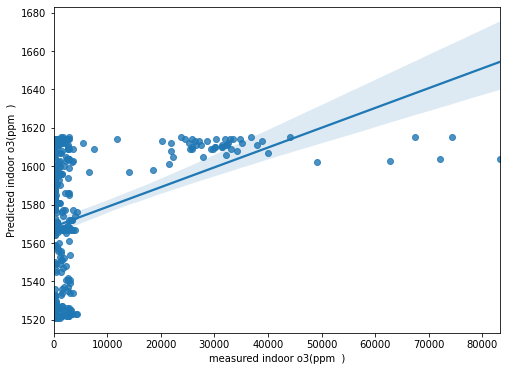

In [35]:
for col in condf1.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionSVR(df=condf4,inp='Date_Time',target=col,name='zaib')

## Zaib DT

Mean Absolute Error of PM2.5(ug/m3): 127.00322580645161
Mean Squared Error of PM2.5(ug/m3): 190978.37258064517
Root Mean Squared Error of PM2.5(ug/m3): 437.0107236449069
Mean Absolute Error of PM10(ug/m3): 177.7516129032258
Mean Squared Error of PM10(ug/m3): 346685.53387096775
Root Mean Squared Error of PM10(ug/m3): 588.8000797137919
Mean Absolute Error of co(ppm  ): 7.0202064516129035
Mean Squared Error of co(ppm  ): 158.23591234032259
Root Mean Squared Error of co(ppm  ): 12.579185678744176


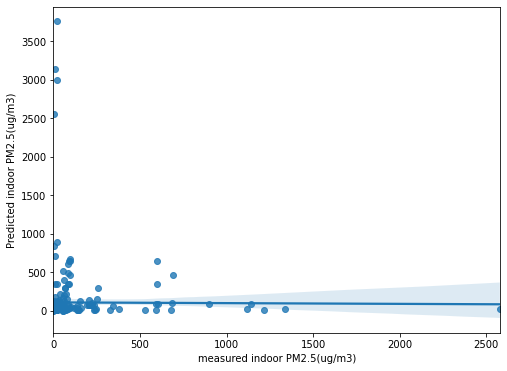

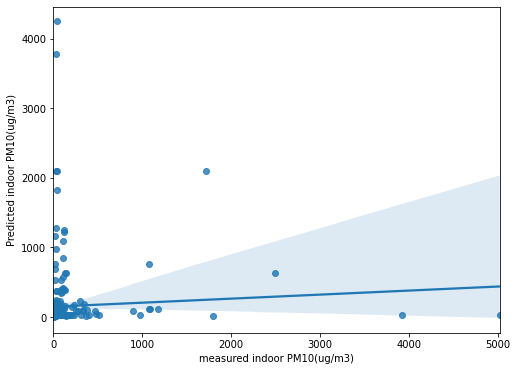

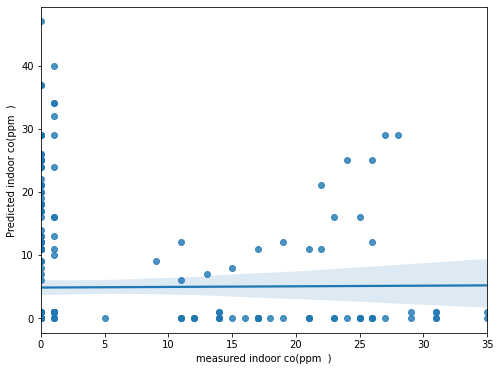

Mean Absolute Error of no2(ppm  ): 1946.4516129032259
Mean Squared Error of no2(ppm  ): 28407661.29032258
Root Mean Squared Error of no2(ppm  ): 5329.883797074996


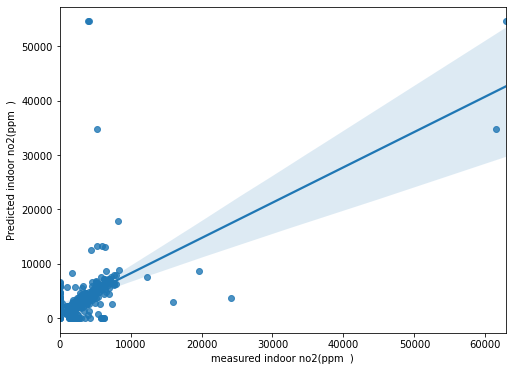

Mean Absolute Error of o3(ppm  ): 9106.451612903225
Mean Squared Error of o3(ppm  ): 315994032.2580647
Root Mean Squared Error of o3(ppm  ): 17776.220977982488


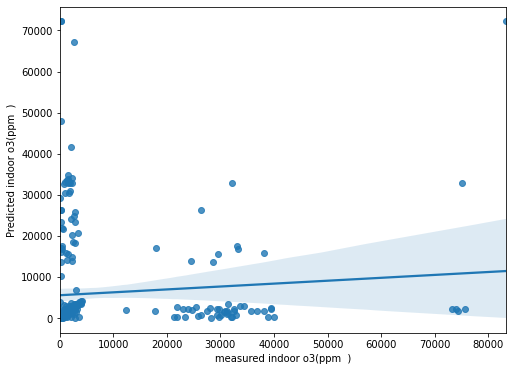

In [36]:
for col in condf1.columns:
    if col is None:
        break
    if col!='Date_Time':
        prd=getPredictionDT(df=condf4,inp='Date_Time',target=col,name='zaib')